In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

In [6]:
iris = datasets.load_iris()

In [7]:
df = pd.DataFrame(iris.data[:100], columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = iris.target[:100]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [138]:
y.sum(), noisy_y.sum()

(50, 53)

In [9]:
# добавим категориальную фичу, коррелирующую с таргетом
# для этого добавим немного шума в таргет, получим также вектор состоящий из 0 и 1
noisy_y = deepcopy(y)
for i in np.random.randint(0, len(y), 20):
    if i%2 == 0:
        noisy_y[i] = 0
    else:
        noisy_y[i] = 1

print(noisy_y)
print(np.corrcoef(y, noisy_y)[0, 1])

# изменим 0 и 1 в новом векторе на какие-нибудь строковые значения
df.loc[:, 'country'] = pd.Series(noisy_y).map({0: 'netherlands', 1: 'sweden'}) 

# добавим таргет отдельной колонкой для удобства
df.loc[:, 'target'] = y

[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
0.84


In [10]:
# перемешаем немного датафрейм, чтобы было видно разные значения категориальной фичи в head
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),country,target
0,5.1,2.5,3.0,1.1,netherlands,1
1,5.5,2.3,4.0,1.3,sweden,1
2,6.6,3.0,4.4,1.4,sweden,1
3,5.1,3.4,1.5,0.2,netherlands,0
4,5.0,2.3,3.3,1.0,sweden,1


# fit и transform для энкодеров

### (!) не делаем лик данных из теста в трейн когда трансформируем категориальные переменные

### Схема

- train: <font color="green">fit_transform</font>
- test: <font color="red">transform</font>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    df['target'],
                                                    stratify=df['target'],
                                                    test_size=0.3,
                                                    random_state=2)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),country,target
86,5.1,3.3,1.7,0.5,netherlands,0
76,5.5,2.6,4.4,1.2,sweden,1
59,5.4,3.0,4.5,1.5,sweden,1
41,6.0,2.7,5.1,1.6,sweden,1
20,5.7,3.8,1.7,0.3,netherlands,0


In [13]:
# OneHotEncoder правильно 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe.fit_transform(X_train[['country']])[:20]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [14]:
ohe.get_feature_names()

array(['x0_netherlands', 'x0_sweden'], dtype=object)

In [15]:
ohe.transform(X_test[['country']])[:20]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [16]:
# что будет, если добавим еще одну категорию в фичу и она попадет в тест
X_test.loc[X_test.index.max() + 1] = [0, 0, 0, 0, 'bulgaria', 1]

In [17]:
X_test.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),country,target
46,5.8,2.7,3.9,1.2,sweden,1
84,4.9,3.6,1.4,0.1,netherlands,0
17,5.0,3.0,1.6,0.2,netherlands,0
34,4.9,3.1,1.5,0.1,netherlands,0
100,0.0,0.0,0.0,0.0,bulgaria,1


In [18]:
# так как handle_unknown='ignore', последняя строка просто [0, 0]
ohe.transform(X_test[['country']])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.]])

# Target encoding

https://medium.com/analytics-vidhya/target-encoding-done-the-right-way-b6391e66c19f

Используем всегда

Схема: каждое значение в категориальной переменной кодируется как target.mean() 

In [19]:
X_train.groupby('country').agg({'target': np.mean})

,target
country,
netherlands,0.083333
sweden,0.941176


In [152]:
d = X_train.groupby('country')['target'].mean().to_dict()
d

{'netherlands': 0.0625, 'sweden': 0.868421052631579}

In [160]:
X_train.loc[:, 'country_encoded'] = X_train['country'].map(d)

In [161]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),country,target,country_encoded
87,5.4,3.4,1.5,0.4,sweden,0,0.868421
63,4.9,2.4,3.3,1.0,sweden,1,0.868421
46,7.0,3.2,4.7,1.4,sweden,1,0.868421
35,5.7,2.6,3.5,1.0,sweden,1,0.868421
17,4.8,3.1,1.6,0.2,netherlands,0,0.062500


# TF-IDF

https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

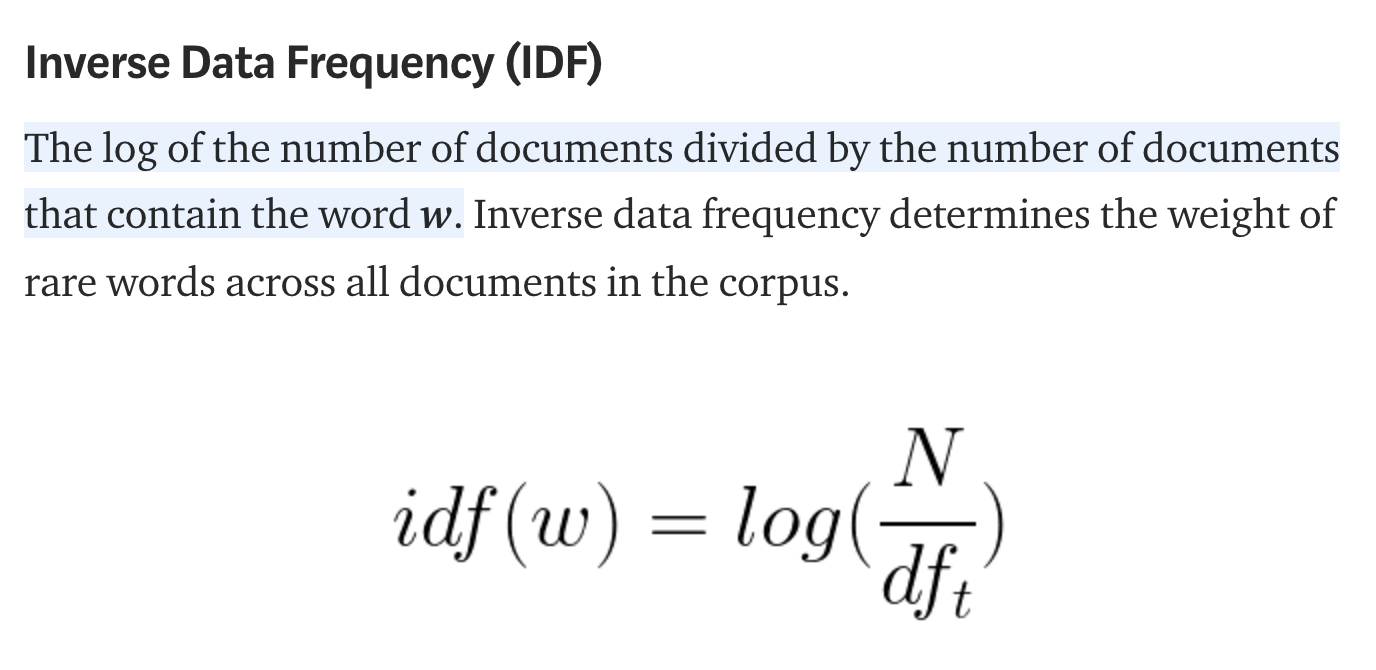
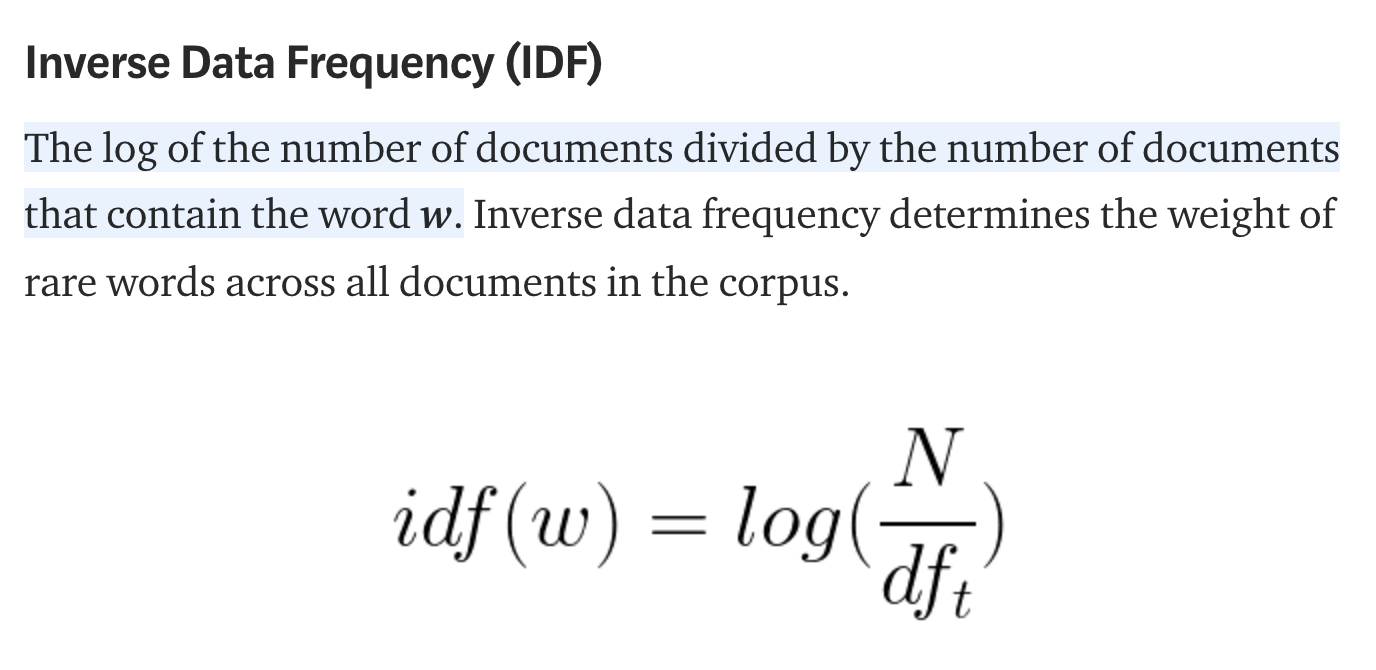

In [175]:
df = pd.DataFrame([['i love cats'], ['cats love me']])
df

,0
0,i love cats
1,cats love me


In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word',
                        tokenizer=lambda x: x,
                        preprocessor=lambda x: x,
                        token_pattern=None,
                        binary=True)

df_tfidf = tfidf.fit_transform(df[0])
df_tfidf.todense()

matrix([[0.30184999, 0.30184999, 0.30184999, 0.30184999, 0.42423963,
         0.30184999, 0.        , 0.30184999, 0.30184999, 0.30184999,
         0.30184999],
        [0.30184999, 0.30184999, 0.30184999, 0.30184999, 0.        ,
         0.30184999, 0.42423963, 0.30184999, 0.30184999, 0.30184999,
         0.30184999]])